X shape: (1797, 64)
y shape: (1797,)


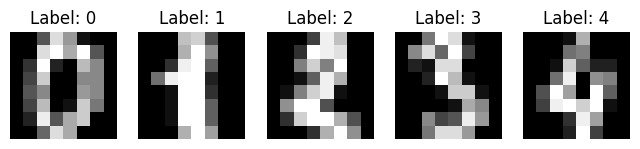

K=3 → Accuracy: 0.9667
K=5 → Accuracy: 0.9639
K=7 → Accuracy: 0.9667
K=9 → Accuracy: 0.9639


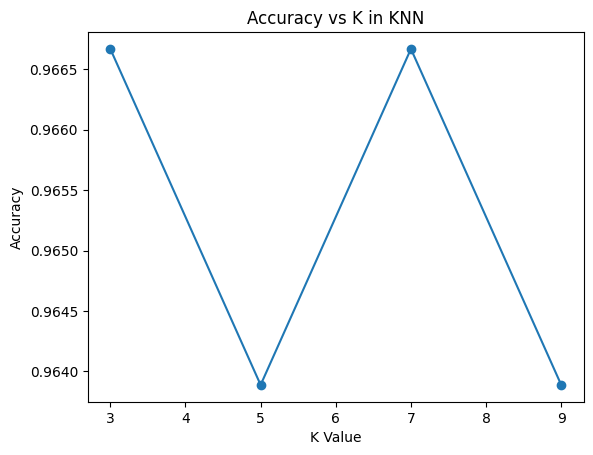

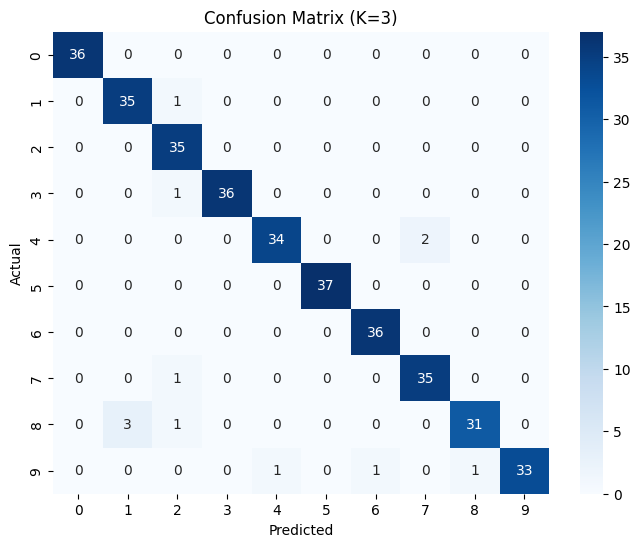

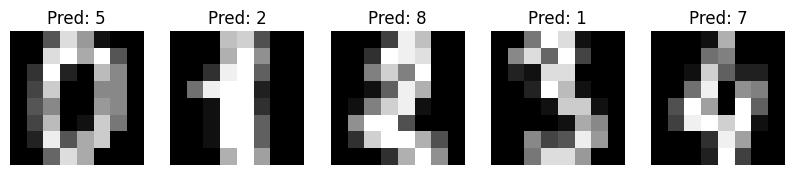

✅ Final Best K: 3
✅ Final Accuracy: 0.9667


In [2]:


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

digits = load_digits()
X = digits.data
y = digits.target

print("X shape:", X.shape)
print("y shape:", y.shape)

plt.figure(figsize=(8, 3))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(digits.images[i], cmap="gray")
    plt.title(f"Label: {y[i]}")
    plt.axis("off")
plt.show()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

k_values = [3, 5, 7, 9]
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K={k} → Accuracy: {acc:.4f}")

plt.figure()
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K in KNN")
plt.show()

best_k = k_values[np.argmax(accuracies)]
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)

cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix (K={best_k})")
plt.show()

plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(digits.images[i], cmap="gray")
    plt.title(f"Pred: {knn_best.predict(X_test[i].reshape(1, -1))[0]}")
    plt.axis("off")
plt.show()

print(f"✅ Final Best K: {best_k}")
print(f"✅ Final Accuracy: {max(accuracies):.4f}")
